In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('train.csv')

## Exploratory Data Analysis (EDA)


In [4]:
# Display basic dataset info
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence 

In [5]:
# Display summary statistics
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


In [6]:
# Check for missing values
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

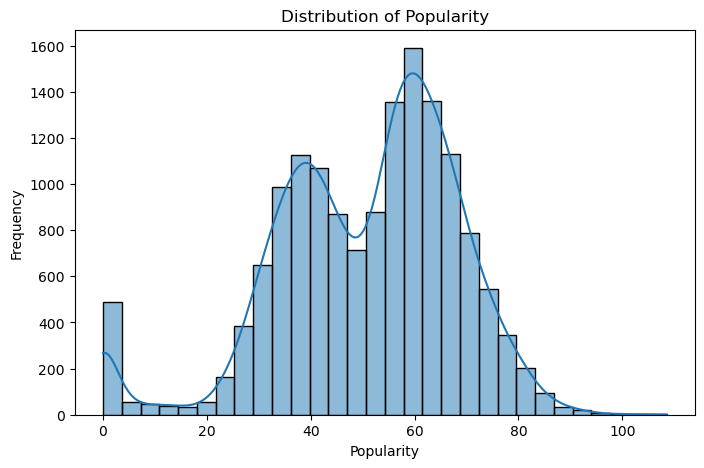

In [7]:
# Visualizations:
# Distribution of 'popularity'
plt.figure(figsize=(8, 5))
sns.histplot(data['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

In [12]:
# Define numerical and categorical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

In [13]:
# Handling missing data in numerical columns by filling with mean
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

In [14]:
# Handling missing data in categorical columns by filling with 'Unknown'
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

In [15]:
# Verify if there are any remaining missing values
missing_values = data.isnull().sum()

In [16]:
data.isnull().sum()

instance_id               0
track_name                0
popularity                0
acousticness              0
danceability              0
duration_ms               0
energy                    0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
voice_gender              0
mode                      0
speechiness               0
tempo                     0
musician_category         0
valence                   0
music_genre_Country       0
music_genre_Electronic    0
music_genre_Hip-Hop       0
music_genre_Jazz          0
music_genre_Rap           0
music_genre_Rock          0
dtype: int64

In [17]:
# Handling non-numeric columns (e.g., 'tempo')
data['tempo'] = data['tempo'].str.replace('?', '0').astype(float)

C:\Users\acer\AppData\Local\Temp\ipykernel_28536\3453075408.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['tempo'] = data['tempo'].str.replace('?', '0').astype(float)


In [18]:
# Encoding Categorical Features
categorical_cols = data.select_dtypes(include=[np.object]).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_28536\1419576471.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = data.select_dtypes(include=[np.object]).columns


In [20]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [23]:
# Splitting data into features (X) and target (y)
target = data['popularity']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target, test_size=0.2, random_state=42)

In [25]:
# Modeling: Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")

In [ ]:
f"R-squared: {r2}"

## Fine-tuning

In [ ]:
# Using GridSearchCV for hyperparameter tuning with Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
}

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

In [ ]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

In [ ]:
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [ ]:
print("Random Forest Hyperparameter Tuning Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")